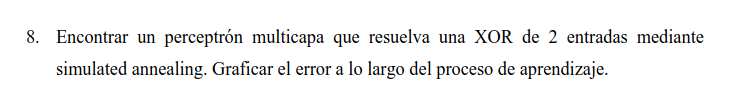

In [75]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [71]:
import numpy as np
import matplotlib.pyplot as plt

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights with small random values
        self.weights_input_hidden = np.random.uniform(-0.5, 0.5, (input_size, hidden_size)) * 0.1
        self.weights_hidden_output = np.random.uniform(-0.5, 0.5, (hidden_size, output_size)) * 0.1
        self.bias_hidden = np.random.uniform(-0.5, 0.5, (1, hidden_size)) * 0.1
        self.bias_output = np.random.uniform(-0.5, 0.5, (1, output_size)) * 0.1

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self.sigmoid(hidden_input)
        final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        final_output = self.sigmoid(final_input)
        return final_output

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def simulated_annealing(self, X, y, initial_temp=10000, final_temp=1, alpha=0.999, max_iter=500):
        current_temp = initial_temp
        current_weights_input_hidden = self.weights_input_hidden.copy()
        current_weights_hidden_output = self.weights_hidden_output.copy()
        current_bias_hidden = self.bias_hidden.copy()
        current_bias_output = self.bias_output.copy()
        best_loss = self.compute_loss(y, self.forward(X))
        best_weights_input_hidden = current_weights_input_hidden.copy()
        best_weights_hidden_output = current_weights_hidden_output.copy()
        best_bias_hidden = current_bias_hidden.copy()
        best_bias_output = current_bias_output.copy()
        errors = []
        best_errors = []

        iteration = 0
        while current_temp > final_temp:
            iteration += 1
            for _ in range(max_iter):
                # Se reduce los saltos en cada iteración
                step_size = current_temp / initial_temp * 0.5

                # Se proponen pesos nuevos con ruido gaussiano
                new_weights_input_hidden = current_weights_input_hidden + np.random.normal(0, step_size, current_weights_input_hidden.shape)
                new_weights_hidden_output = current_weights_hidden_output + np.random.normal(0, step_size, current_weights_hidden_output.shape)
                new_bias_hidden = current_bias_hidden + np.random.normal(0, step_size, current_bias_hidden.shape)
                new_bias_output = current_bias_output + np.random.normal(0, step_size, current_bias_output.shape)

                self.weights_input_hidden = new_weights_input_hidden
                self.weights_hidden_output = new_weights_hidden_output
                self.bias_hidden = new_bias_hidden
                self.bias_output = new_bias_output

                y_pred = self.forward(X)
                new_loss = self.compute_loss(y, y_pred)

                delta_loss = new_loss - best_loss
                acceptance_probability = np.exp(-delta_loss / current_temp) if delta_loss > 0 else 1

                if acceptance_probability > np.random.rand():
           
                    current_weights_input_hidden = new_weights_input_hidden
                    current_weights_hidden_output = new_weights_hidden_output
                    current_bias_hidden = new_bias_hidden
                    current_bias_output = new_bias_output
                    if new_loss < best_loss:
                        best_loss = new_loss
                        best_weights_input_hidden = new_weights_input_hidden.copy()
                        best_weights_hidden_output = new_weights_hidden_output.copy()
                        best_bias_hidden = new_bias_hidden.copy()
                        best_bias_output = new_bias_output.copy()

            best_errors.append(best_loss)
            errors.append(new_loss)
            current_temp *= alpha

            if iteration % 10 == 0:
                print(f"Iteration {iteration}, Temperature {current_temp:.2f}, Best Loss {best_loss:.6f}")

        # Guarda los mejores pesos
        self.weights_input_hidden = best_weights_input_hidden
        self.weights_hidden_output = best_weights_hidden_output
        self.bias_hidden = best_bias_hidden
        self.bias_output = best_bias_output

        return best_errors, errors

Iteration 10, Temperature 32682.91, Best Loss 0.000570
Iteration 20, Temperature 26704.32, Best Loss 0.000570
Iteration 30, Temperature 21819.37, Best Loss 0.000570
Iteration 40, Temperature 17828.02, Best Loss 0.000570
Iteration 50, Temperature 14566.79, Best Loss 0.000570
Iteration 60, Temperature 11902.13, Best Loss 0.000570
Iteration 70, Temperature 9724.90, Best Loss 0.000570
Iteration 80, Temperature 7945.95, Best Loss 0.000570
Iteration 90, Temperature 6492.42, Best Loss 0.000570
Iteration 100, Temperature 5304.78, Best Loss 0.000570
Iteration 110, Temperature 4334.39, Best Loss 0.000570
Iteration 120, Temperature 3541.51, Best Loss 0.000570
Iteration 130, Temperature 2893.68, Best Loss 0.000570
Iteration 140, Temperature 2364.34, Best Loss 0.000570
Iteration 150, Temperature 1931.84, Best Loss 0.000570
Iteration 160, Temperature 1578.45, Best Loss 0.000570
Iteration 170, Temperature 1289.71, Best Loss 0.000570
Iteration 180, Temperature 1053.79, Best Loss 0.000570
Iteration 190

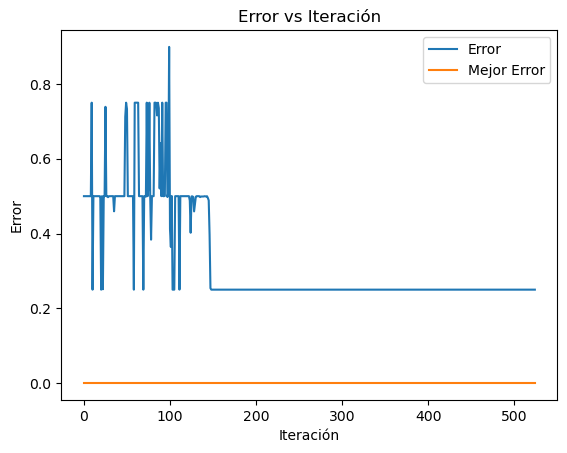

Predicciones:
Input: [0 0], Predecido: 0.0049, Esperado: 0
Input: [0 1], Predecido: 0.9531, Esperado: 1
Input: [1 0], Predecido: 0.9999, Esperado: 1
Input: [1 1], Predecido: 0.0073, Esperado: 0


In [ ]:
%%skip
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([
    [0],
    [1],
    [1],
    [0]
])
mlp = MLP(input_size=2, hidden_size=10, output_size=1)

best_errors, errors = mlp.simulated_annealing(
    X, y,
    initial_temp=40000,
    final_temp=1,
    alpha=0.98,
    max_iter=1500
)
plt.plot(errors)
plt.plot(best_errors)
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.legend(['Error', 'Mejor Error'])
plt.title('Error vs Iteración')
plt.show()

outputs = mlp.forward(X)
print("Predicciones:")
for input_data, output, target in zip(X, outputs, y):
    print(f"Input: {input_data}, Predecido: {output[0]:.4f}, Esperado: {target[0]}")

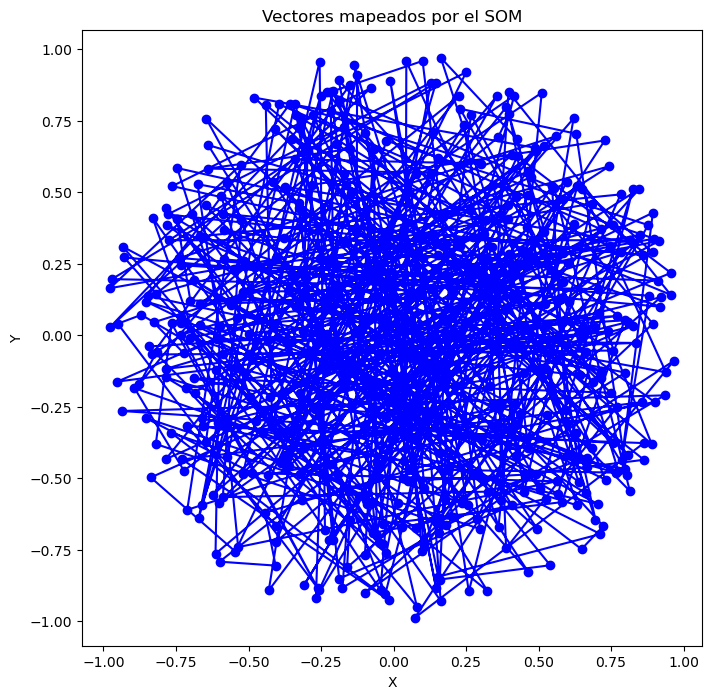

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

class SOM:
    def __init__(self, x, y, input_len, learning_rate=0.5, radius=None, radius_decay=0.99):
        self.x = x
        self.y = y
        self.input_len = input_len
        self.learning_rate = learning_rate
        self.radius = radius if radius else max(x, y) / 2
        self.radius_decay = radius_decay
        self.weights = np.random.rand(x, y, input_len)
        self.iterations = 0

    def _euclidean_distance(self, a, b):
        return np.linalg.norm(a - b)

    def _find_bmu(self, sample):
        bmu_idx = np.array([0, 0])
        min_dist = np.inf
        for i in range(self.x):
            for j in range(self.y):
                dist = self._euclidean_distance(self.weights[i, j], sample)
                if dist < min_dist:
                    min_dist = dist
                    bmu_idx = np.array([i, j])
        return bmu_idx

    def _update_weights(self, sample, bmu_idx):
        for i in range(self.x):
            for j in range(self.y):
                dist_to_bmu = self._euclidean_distance(np.array([i, j]), bmu_idx)
                if dist_to_bmu <= self.radius:
                    influence = np.exp(-dist_to_bmu / (2 * (self.radius ** 2)))
                    self.weights[i, j] += influence * self.learning_rate * (sample - self.weights[i, j])

    def train(self, data, num_iterations):
        for iteration in range(num_iterations):
            self.iterations += 1
            sample = data[np.random.randint(0, data.shape[0])]
            bmu_idx = self._find_bmu(sample)
            self._update_weights(sample, bmu_idx)
            self.learning_rate *= self.radius_decay
            self.radius *= self.radius_decay

    def map_vects(self, data):
        mapped = np.array([self._find_bmu(sample) for sample in data])
        return mapped



num_points = 500
angles = np.random.uniform(0, 2 * np.pi, num_points)
radii = np.sqrt(np.random.uniform(0, 1, num_points))
X_circle = np.vstack((radii * np.cos(angles), radii * np.sin(angles))).T

# Train the SOM with the generated points
som = SOM(x=10, y=10, input_len=2, learning_rate=0.5)
som.train(X_circle, num_iterations=1000)

# Plot the mapped vectors in their respective coordinates inside the unit circle
plt.figure(figsize=(8, 8))
plt.plot(X_circle[:, 0], X_circle[:, 1], c='blue', marker='o')
plt.title('Vectores mapeados por el SOM')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()